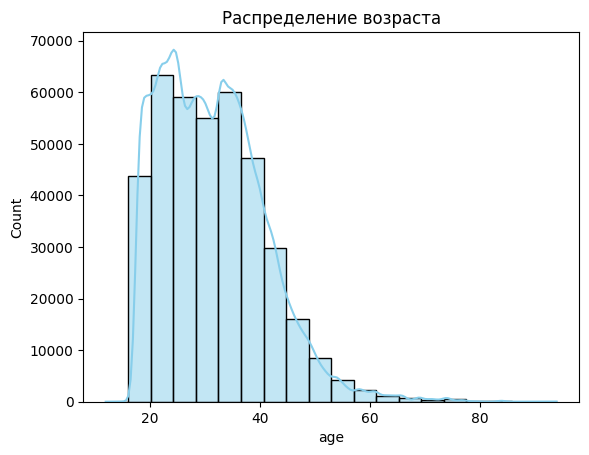

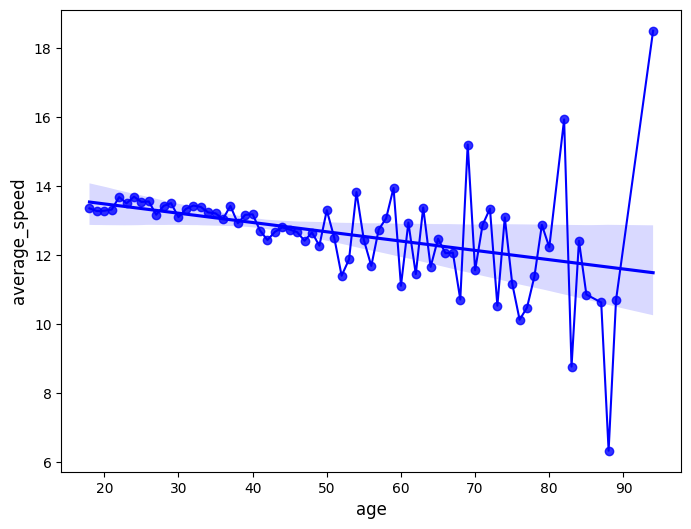

-0.0362185084389592
390877


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('kicksharing_drop.csv', index_col=0) #считываю очищенный файл
data['local_book_start_dttm'] = pd.to_datetime(data['local_book_start_dttm'])
data['book_end_dttm'] = pd.to_datetime(data['book_end_dttm'])
data['book_start_dttm'] = pd.to_datetime(data['book_start_dttm'])
data['created_dttm'] = pd.to_datetime(data['created_dttm'])
data['hour'] = pd.to_datetime(data['local_book_start_dttm']).dt.hour

data['hour'] = np.where(data['hour'] <= 20,
                                  data['hour'] + 3,      # Условие hour <= 20
                                  (data['hour'] + 3) - 23)  # Иначе

def get_day_time(hour):
    if 4 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 16:
        return 'afternoon'
    elif 17 <= hour <= 22:
        return 'evening'
    else:
        return 'night'
    
data['age_square'] = data['age'] ** 2

data['trip_number'] = data.groupby('party_rk').cumcount() + 1

# Применяем функцию к каждому значению столбца hour
data['day_time'] = data['hour'].apply(get_day_time)

# Проверка результата

data['seconds_difference'] = (data['book_start_dttm'] - data['created_dttm']).dt.total_seconds()
data = data[data['seconds_difference'] > 0]
mean = data['seconds_difference'].mean()
std = data['seconds_difference'].std()

# Вычисление Z-оценки
z_scores = (data['seconds_difference'] - mean) / std

# Условие для фильтрации (например, выбросы за пределами 3 стандартных отклонений)
data = data[np.abs(z_scores) <= 3]


sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Распределение возраста')
plt.show()
#гитограмма распределения возраста


age_grouped = data[data['age'] >= 18].groupby('age').agg({'average_speed': 'mean'}).reset_index()

# Создание графика
plt.figure(figsize=(8, 6))  # Размер графика

# Построение scatter-графика
sns.regplot(data=age_grouped, x='age', y='average_speed', color='blue')

plt.plot(age_grouped['age'], age_grouped['average_speed'], color='blue')

# Настройка фона
plt.gcf().set_facecolor('white')  # Белый фон графика

# Настройка меток осей
plt.xlabel('age', fontsize=12)
plt.ylabel('average_speed', fontsize=12)

# Показываем график
plt.show()
print(data[data['age'] >= 18]['average_speed'].corr(data[data['age'] >= 18]['age']))

data = data[data['age'] < 69]



print(len(data))

import statsmodels.api as sm

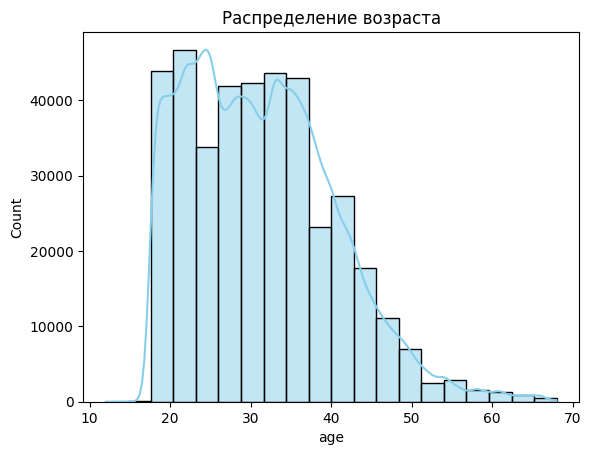

In [29]:
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Распределение возраста')
plt.show()
#гитограмма распределения возраста

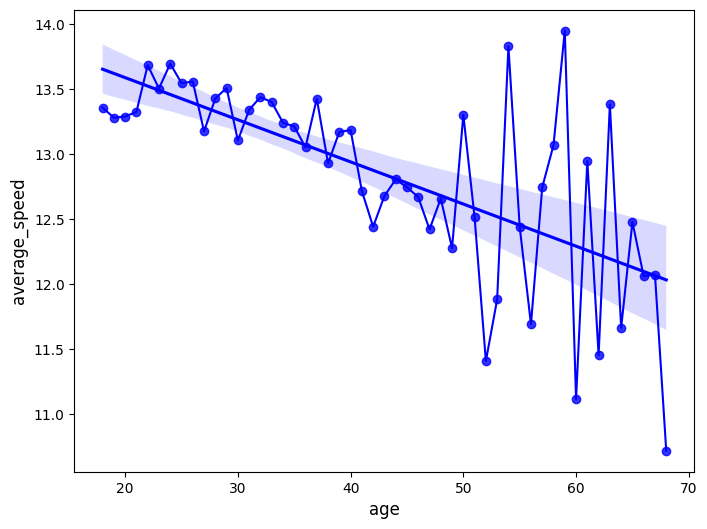

-0.03665538672739588


In [30]:
age_grouped = data[data['age'] >= 18].groupby('age').agg({'average_speed': 'mean'}).reset_index()

# Создание графика
plt.figure(figsize=(8, 6))  # Размер графика

# Построение scatter-графика
sns.regplot(data=age_grouped, x='age', y='average_speed', color='blue')

plt.plot(age_grouped['age'], age_grouped['average_speed'], color='blue')

# Настройка фона
plt.gcf().set_facecolor('white')  # Белый фон графика

# Настройка меток осей
plt.xlabel('age', fontsize=12)
plt.ylabel('average_speed', fontsize=12)

# Показываем график
plt.show()
print(data[data['age'] >= 18]['average_speed'].corr(data[data['age'] >= 18]['age']))

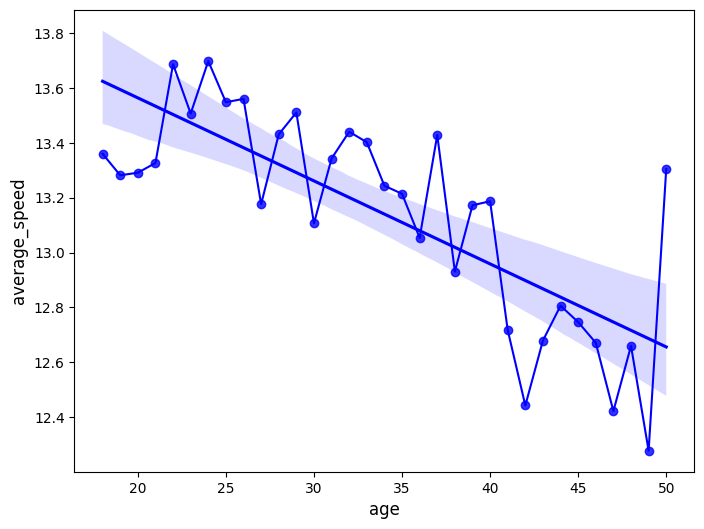

-0.03665538672739588


In [31]:
age_grouped = data[(data['age'] >= 18) & (data['age'] <= 50)].groupby('age').agg({'average_speed': 'mean'}).reset_index()

# Создание графика
plt.figure(figsize=(8, 6))  # Размер графика

# Построение scatter-графика
sns.regplot(data=age_grouped, x='age', y='average_speed', color='blue')

plt.plot(age_grouped['age'], age_grouped['average_speed'], color='blue')

# Настройка фона
plt.gcf().set_facecolor('white')  # Белый фон графика

# Настройка меток осей
plt.xlabel('age', fontsize=12)
plt.ylabel('average_speed', fontsize=12)

# Показываем график
plt.show()
print(data[data['age'] >= 18]['average_speed'].corr(data[data['age'] >= 18]['age']))

C:\Users\darak\AppData\Local\Temp\ipykernel_46920\1762957085.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['hour', 'age_group']).size().unstack(fill_value=0)


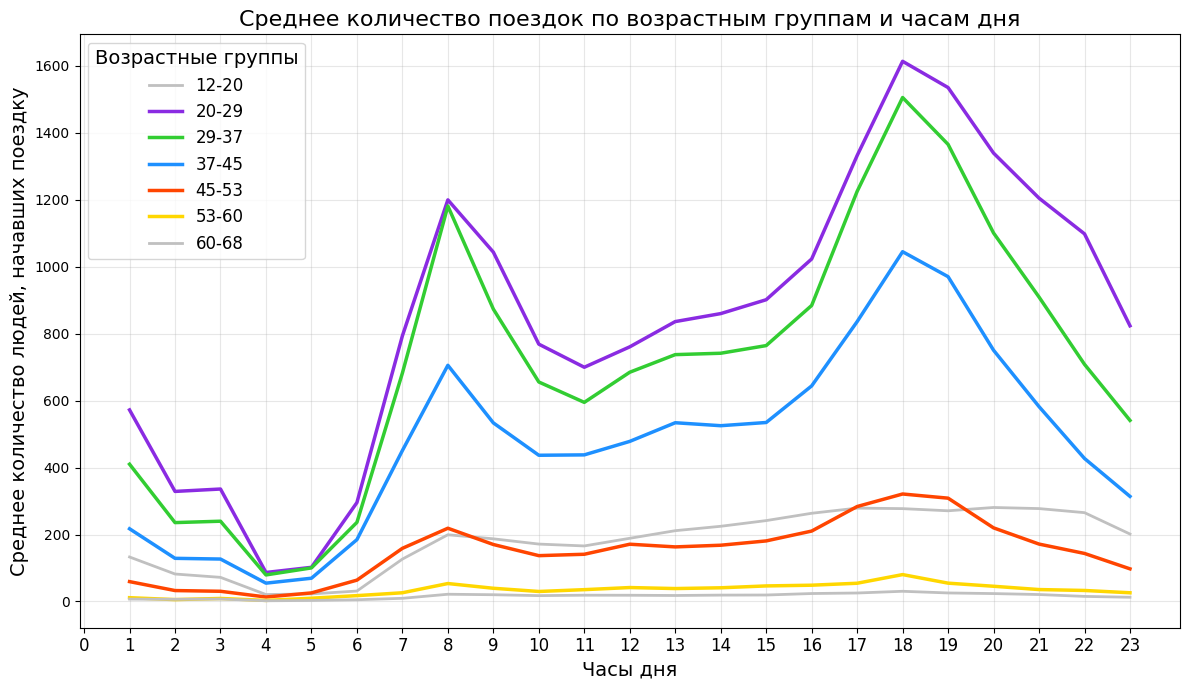

In [32]:
bins = [12, 20, 29, 37, 45, 53, 60, 68]
labels = ["12-20", "20-29", "29-37", "37-45", "45-53", "53-60", "60-68"]
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Группировка данных по часам и возрастным группам
grouped = data.groupby(['hour', 'age_group']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
# Рассчитываем среднее количество людей для каждого часа
average_per_hour = grouped / len(grouped.columns)


colors = {
    '12-20': '#C0C0C0',  # Очень светло-серый
    '60-68': '#C0C0C0',  # Очень светло-серый
    '20-29': '#8A2BE2',  # Ярко-фиолетовый (новый цвет)
    '29-37': '#32CD32',  # Ярко-зеленый
    '37-45': '#1E90FF',  # Ярко-синий
    '45-53': '#FF4500',  # Оранжево-красный (новый цвет)
    '53-60': '#FFD700',  # Золотой
}

# Цикл по возрастным группам
for column in average_per_hour.columns:
    color = colors.get(column, 'black')  # Цвет из словаря или черный по умолчанию
    linewidth = 2.5 if column not in ['12-20', '60-68'] else 2  # Тонкие линии для серых групп
    plt.plot(average_per_hour.index, average_per_hour[column], 
             label=column, linewidth=linewidth, color=color)

# Настройки графика
plt.title("Среднее количество поездок по возрастным группам и часам дня", fontsize=16)
plt.xlabel("Часы дня", fontsize=14)
plt.ylabel("Среднее количество людей, начавших поездку", fontsize=14)
plt.xticks(range(0, 24), fontsize=12)  # Метки по оси X (0-23)
plt.legend(title="Возрастные группы", fontsize=12, title_fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# Показать график
plt.show()







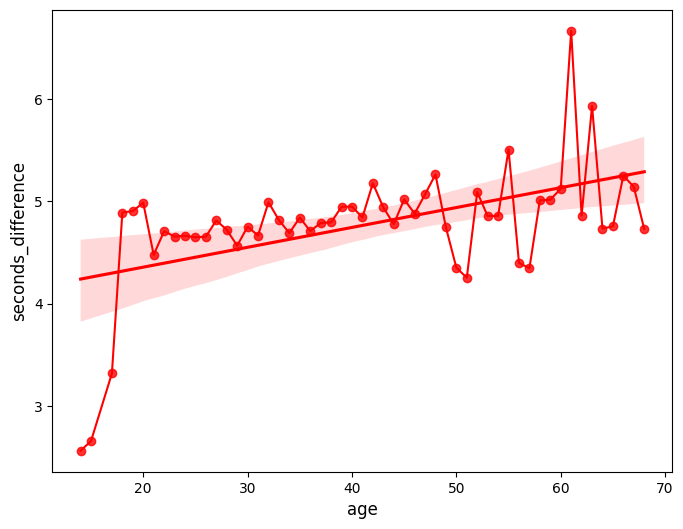

0.007436513857320843


In [33]:
female = data[data['gender_cd'] == 'F']
female = female.groupby('age', as_index=False).agg({'seconds_difference': 'mean'})
plt.figure(figsize=(8, 6))  # Размер графика

# Построение scatter-графика
sns.regplot(data=female, x='age', y='seconds_difference', color='red')

plt.plot(female['age'], female['seconds_difference'], color='red')

# Настройка фона
plt.gcf().set_facecolor('white')  # Белый фон графика

# Настройка меток осей
plt.xlabel('age', fontsize=12)
plt.ylabel('seconds_difference', fontsize=12)

# Показываем график
plt.show()
print(data[data['age'] >= 18]['seconds_difference'].corr(data[data['age'] >= 18]['age']))

In [34]:
dummies = pd.get_dummies(data['day_time'], prefix='day_time')

# удаление одной из колонок дамми в качестве базовой категории
base_category = 'day_time_morning'  # Здесь выбираем базовую категорию
dummies = dummies.drop(columns=[base_category])

# объединяю
cleaned_data_encoded = pd.concat([data.reset_index(drop=True), dummies], axis=1)

# определяю зависимую и независимые
X = cleaned_data_encoded[['age_square', 'age', 'trip_number'] + list(dummies.columns)]
y = cleaned_data_encoded['seconds_difference']

# чтобы бех ошибок
X = X.astype(float)
y = y.astype(float)

# Проверка на NaN и удаление пропущенных значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]  # Синхронизация индексов

# Добавление константы для модели statsmodels
X_const = sm.add_constant(X)

# Построение модели линейной регрессии
model_sm = sm.OLS(y, X_const).fit()

# Вывод результатов
print(model_sm.summary())

rss = model_sm.ssr
rss

                            OLS Regression Results                            
Dep. Variable:     seconds_difference   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     134.6
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          4.73e-171
Time:                        21:34:24   Log-Likelihood:            -1.0079e+06
No. Observations:              385105   AIC:                         2.016e+06
Df Residuals:                  385098   BIC:                         2.016e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0029      0

np.float64(4230286.7440426)

In [35]:
data[data['gender_cd'] == "M"]

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,loyalty_accrual_bns_amt,travel_time,travel_time_h,average_speed,hour,age_square,trip_number,day_time,seconds_difference,age_group
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,...,NaN,0 days 00:20:30.014272,0.341671,10.789474,14,1600,1,afternoon,4.325252,37-45
3,351562959,541367366,M,24,GRD,UNM,МОСКВА,8.99,50.0,300.0,...,NaN,0 days 00:02:18.562918,0.038490,13.131579,19,576,1,evening,4.162000,20-29
4,258647149,238473615,M,34,NaN,NaN,МОСКВА,6.99,50.0,300.0,...,NaN,0 days 00:10:05.429337,0.168175,15.488095,9,1156,1,morning,3.017125,29-37
5,277397094,5247768,M,42,NaN,NaN,МОСКВА,7.49,50.0,300.0,...,NaN,0 days 00:00:39.608495,0.011002,1.454545,12,1764,1,afternoon,6.036000,37-45
7,265062394,866880584,M,38,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,...,NaN,0 days 00:09:09.347642,0.152597,15.496732,8,1444,1,morning,3.493851,37-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,349109813,755778419,M,18,NaN,NaN,СВЕРДЛОВСКАЯ ОБЛ,6.49,30.0,300.0,...,NaN,0 days 00:05:54.660313,0.098517,15.707071,16,324,21,afternoon,4.885000,12-20
396745,348829245,1146263947,M,23,NaN,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,8.99,30.0,300.0,...,NaN,0 days 00:08:11.638279,0.136566,16.576642,22,529,8,evening,3.954000,20-29
396746,273529251,1012601147,M,20,NaN,NaN,ТЮМЕНСКАЯ ОБЛ,8.79,50.0,300.0,...,NaN,0 days 00:20:22.198631,0.339500,4.162242,19,400,4,evening,2.311487,20-29
396747,306062051,863877659,M,19,NaN,NaN,САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,...,NaN,0 days 00:03:32.510827,0.059031,16.983051,21,361,1,evening,2.401000,12-20


In [39]:
dummies = pd.get_dummies(data['day_time'], prefix='day_time')

# удаление одной из колонок дамми в качестве базовой категории
base_category = 'day_time_morning'  # Здесь выбираем базовую категорию
dummies = dummies.drop(columns=[base_category])

# объединяю
cleaned_data_encoded = pd.concat([data[data['gender_cd'] == "M"].reset_index(drop=True), dummies], axis=1)

# определяю зависимую и независимые
X = cleaned_data_encoded[['age_square', 'age', 'trip_number'] + list(dummies.columns)]
y = cleaned_data_encoded['seconds_difference']

# чтобы бех ошибок
X = X.astype(float)
y = y.astype(float)

# Проверка на NaN и удаление пропущенных значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]  # Синхронизация индексов

# Добавление константы для модели statsmodels
X_const = sm.add_constant(X)

# Построение модели линейной регрессии
model_sm = sm.OLS(y, X_const).fit()

# Вывод результатов
print(model_sm.summary())

rss1 = model_sm.ssr
rss1

                            OLS Regression Results                            
Dep. Variable:     seconds_difference   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     113.3
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          1.98e-143
Time:                        21:38:57   Log-Likelihood:            -8.5413e+05
No. Observations:              326385   AIC:                         1.708e+06
Df Residuals:                  326378   BIC:                         1.708e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.9900      0

np.float64(3583543.4945876906)

In [38]:
dummies = pd.get_dummies(data['day_time'], prefix='day_time')

# удаление одной из колонок дамми в качестве базовой категории
base_category = 'day_time_morning'  # Здесь выбираем базовую категорию
dummies = dummies.drop(columns=[base_category])

# объединяю
cleaned_data_encoded = pd.concat([data[data['gender_cd'] == "F"].reset_index(drop=True), dummies], axis=1)

# определяю зависимую и независимые
X = cleaned_data_encoded[['age_square', 'age', 'trip_number'] + list(dummies.columns)]
y = cleaned_data_encoded['seconds_difference']

# чтобы бех ошибок
X = X.astype(float)
y = y.astype(float)

# Проверка на NaN и удаление пропущенных значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]  # Синхронизация индексов

# Добавление константы для модели statsmodels
X_const = sm.add_constant(X)

# Построение модели линейной регрессии
model_sm = sm.OLS(y, X_const).fit()

rss2 = model_sm.ssr
print(rss2)

# Вывод результатов
print(model_sm.summary())

609521.712512707
                            OLS Regression Results                            
Dep. Variable:     seconds_difference   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     24.84
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.35e-29
Time:                        21:35:36   Log-Likelihood:            -1.4599e+05
No. Observations:               55851   AIC:                         2.920e+05
Df Residuals:                   55844   BIC:                         2.921e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              

In [ ]:
F = ((rss - rss1 - rss2)/6)/((rss1 + rss2)/(385105 - 12))

In [ ]:
max_data = data[data['transport_model'] == "Max"]


dummies0 = pd.get_dummies(data['gender_cd'], prefix='gender')
# удаление одной из колонок дамми в качестве базовой категории
base_category = 'gender_M'  # Здесь выбираем базовую категорию
dummies0 = dummies0.drop(columns=[base_category])



dummies = pd.get_dummies(data['day_time'], prefix='day_time')

# удаление одной из колонок дамми в качестве базовой категории
base_category = 'day_time_morning'  # Здесь выбираем базовую категорию
dummies = dummies.drop(columns=[base_category])

# объединяю
cleaned_data_encoded = pd.concat([data.reset_index(drop=True), dummies, dummies0], axis=1)

# определяю зависимую и независимые
X = cleaned_data_encoded[['age_square', 'age', 'trip_number'] + list(dummies.columns) + list(dummies0.columns)]
y = cleaned_data_encoded['seconds_difference']

# чтобы бех ошибок
X = X.astype(float)
y = y.astype(float)

# Проверка на NaN и удаление пропущенных значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]  # Синхронизация индексов

# Добавление константы для модели statsmodels
X_const = sm.add_constant(X)

# Построение модели линейной регрессии
model_sm = sm.OLS(y, X_const).fit()

# Вывод результатов
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     seconds_difference   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          5.65e-170
Time:                        19:23:42   Log-Likelihood:            -1.0079e+06
No. Observations:              385105   AIC:                         2.016e+06
Df Residuals:                  385097   BIC:                         2.016e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0032      0

In [ ]:
e_data = data[data['transport_model'] == "E"]


dummies0 = pd.get_dummies(data['gender_cd'], prefix='gender')
# удаление одной из колонок дамми в качестве базовой категории
base_category = 'gender_M'  # Здесь выбираем базовую категорию
dummies0 = dummies0.drop(columns=[base_category])



dummies = pd.get_dummies(data['day_time'], prefix='day_time')

# удаление одной из колонок дамми в качестве базовой категории
base_category = 'day_time_morning'  # Здесь выбираем базовую категорию
dummies = dummies.drop(columns=[base_category])

# объединяю
cleaned_data_encoded = pd.concat([data.reset_index(drop=True), dummies, dummies0], axis=1)

# определяю зависимую и независимые
X = cleaned_data_encoded[['age_square', 'age', 'trip_number'] + list(dummies.columns) + list(dummies0.columns)]
y = cleaned_data_encoded['seconds_difference']

# чтобы бех ошибок
X = X.astype(float)
y = y.astype(float)

# Проверка на NaN и удаление пропущенных значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]  # Синхронизация индексов

# Добавление константы для модели statsmodels
X_const = sm.add_constant(X)

# Построение модели линейной регрессии
model_sm = sm.OLS(y, X_const).fit()

# Вывод результатов
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     seconds_difference   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          5.65e-170
Time:                        19:23:43   Log-Likelihood:            -1.0079e+06
No. Observations:              385105   AIC:                         2.016e+06
Df Residuals:                  385097   BIC:                         2.016e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0032      0

In [ ]:
sl_data = data[data['transport_model'] == "SL"]


dummies0 = pd.get_dummies(data['gender_cd'], prefix='gender')
# удаление одной из колонок дамми в качестве базовой категории
base_category = 'gender_M'  # Здесь выбираем базовую категорию
dummies0 = dummies0.drop(columns=[base_category])



dummies = pd.get_dummies(data['day_time'], prefix='day_time')

# удаление одной из колонок дамми в качестве базовой категории
base_category = 'day_time_morning'  # Здесь выбираем базовую категорию
dummies = dummies.drop(columns=[base_category])

# объединяю
cleaned_data_encoded = pd.concat([data.reset_index(drop=True), dummies, dummies0], axis=1)

# определяю зависимую и независимые
X = cleaned_data_encoded[['age_square', 'age', 'trip_number'] + list(dummies.columns) + list(dummies0.columns)]
y = cleaned_data_encoded['seconds_difference']

# чтобы бех ошибок
X = X.astype(float)
y = y.astype(float)

# Проверка на NaN и удаление пропущенных значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]  # Синхронизация индексов

# Добавление константы для модели statsmodels
X_const = sm.add_constant(X)

# Построение модели линейной регрессии
model_sm = sm.OLS(y, X_const).fit()

# Вывод результатов
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     seconds_difference   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          5.65e-170
Time:                        19:23:44   Log-Likelihood:            -1.0079e+06
No. Observations:              385105   AIC:                         2.016e+06
Df Residuals:                  385097   BIC:                         2.016e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0032      0

In [ ]:
rest_data = data


dummies0 = pd.get_dummies(data['gender_cd'], prefix='gender')
# удаление одной из колонок дамми в качестве базовой категории
base_category = 'gender_M'  # Здесь выбираем базовую категорию
dummies0 = dummies0.drop(columns=[base_category])



dummies = pd.get_dummies(data['day_time'], prefix='day_time')

# удаление одной из колонок дамми в качестве базовой категории
base_category = 'day_time_morning'  # Здесь выбираем базовую категорию
dummies = dummies.drop(columns=[base_category])

# объединяю
cleaned_data_encoded = pd.concat([data.reset_index(drop=True), dummies, dummies0], axis=1)

# определяю зависимую и независимые
X = cleaned_data_encoded[['age_square', 'age', 'trip_number'] + list(dummies.columns) + list(dummies0.columns)]
y = cleaned_data_encoded['seconds_difference']

# чтобы бех ошибок
X = X.astype(float)
y = y.astype(float)

# Проверка на NaN и удаление пропущенных значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = y.loc[X.index]  # Синхронизация индексов

# Добавление константы для модели statsmodels
X_const = sm.add_constant(X)

# Построение модели линейной регрессии
model_sm = sm.OLS(y, X_const).fit()

# Вывод результатов
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     seconds_difference   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 16 Dec 2024   Prob (F-statistic):          5.65e-170
Time:                        19:23:45   Log-Likelihood:            -1.0079e+06
No. Observations:              385105   AIC:                         2.016e+06
Df Residuals:                  385097   BIC:                         2.016e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.0032      0

In [ ]:
F

np.float64(568.3850029773441)

In [ ]:
import scipy

In [ ]:
p =  1 - scipy.stats.f.cdf(569.7, 6, 385105-12)
p

np.float64(1.1102230246251565e-16)